# PROJECT 1 PROPOSAL LEVEL-2
# Idea: Predicting House Prices with Linear Regression

# Data Loading and Cleaning

In [12]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [13]:
data = pd.DataFrame(pd.read_csv("Housing.csv"))
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [14]:
data.shape

(545, 13)

In [23]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [16]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [17]:
data.isnull().sum()*100/housing.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

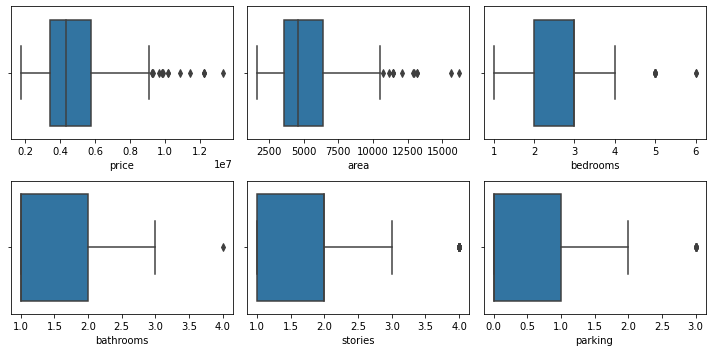

In [18]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(data['price'], ax = axs[0,0])
plt2 = sns.boxplot(data['area'], ax = axs[0,1])
plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(data['stories'], ax = axs[1,1])
plt3 = sns.boxplot(data['parking'], ax = axs[1,2])

plt.tight_layout()

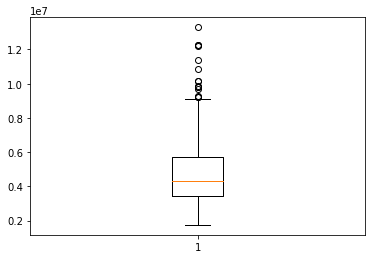

In [19]:
# outlier treatment for price
plt.boxplot(data.price)
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.price >= Q1 - 1.5*IQR) & (data.price <= Q3 + 1.5*IQR)]

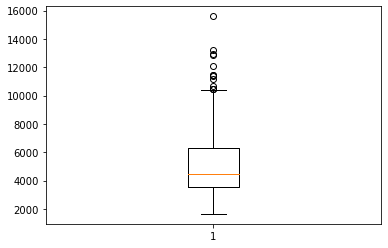

In [20]:
# outlier treatment for area
plt.boxplot(data.area)
Q1 = data.area.quantile(0.25)
Q3 = data.area.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.area >= Q1 - 1.5*IQR) & (data.area <= Q3 + 1.5*IQR)]

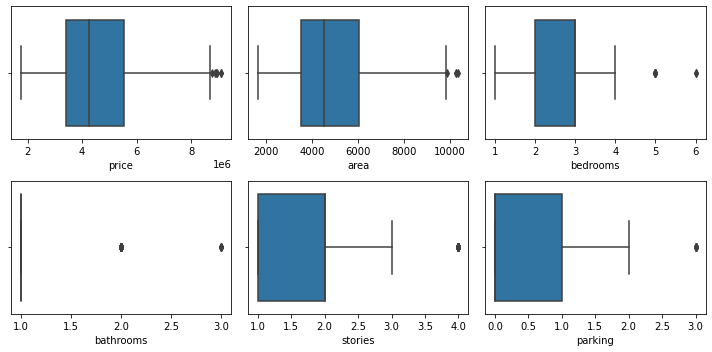

In [21]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(data['price'], ax = axs[0,0])
plt2 = sns.boxplot(data['area'], ax = axs[0,1])
plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(data['stories'], ax = axs[1,1])
plt3 = sns.boxplot(data['parking'], ax = axs[1,2])

plt.tight_layout()

In [24]:
data.dropna(inplace=True)

In [29]:
# Check for duplicate rows
print("Duplicate rows:", data.duplicated().sum())

# Check for unique values in categorical columns
for column in data.select_dtypes(include='object').columns:
    print(column, ":", data[column].unique())

Duplicate rows: 0
mainroad : ['yes' 'no']
guestroom : ['no' 'yes']
basement : ['yes' 'no']
hotwaterheating : ['no' 'yes']
airconditioning : ['no' 'yes']
prefarea : ['no' 'yes']
furnishingstatus : ['semi-furnished' 'unfurnished' 'furnished']


# Feature Selection

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Select features and target variable
selected_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'airconditioning']

# Define features (X) and target variable (y)
X = data[selected_features]
y = data['price']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)  # Drop first column to avoid dummy variable trap

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


# Model Evaluation

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already trained and made predictions using the model as in the previous code snippet

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)


Mean Squared Error: 1180580844816.5537
R-squared: 0.5975958832642759


# Visualization

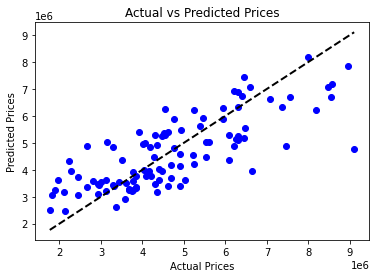

In [36]:

# Scatter plot to visualize the relationship between predicted and actual values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()
